<a href="https://colab.research.google.com/github/mbargaa/Python/blob/main/1008_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')

In [ ]:
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


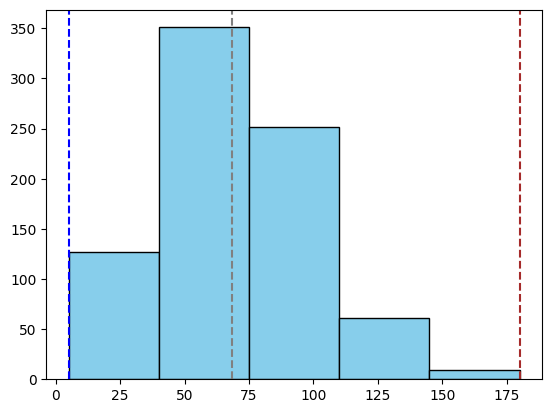

In [ ]:
plt.hist(pokemon_df["Speed"], bins=5, color='skyblue', edgecolor='black')
#Avg line
plt.axvline(pokemon_df['Speed'].mean(), linestyle='dashed', color='gray')

#Min line
plt.axvline(pokemon_df['Speed'].min(), linestyle = 'dashed', color='blue')

#Max line
plt.axvline(pokemon_df['Speed'].max(), linestyle = 'dashed', color='brown')
plt.show()

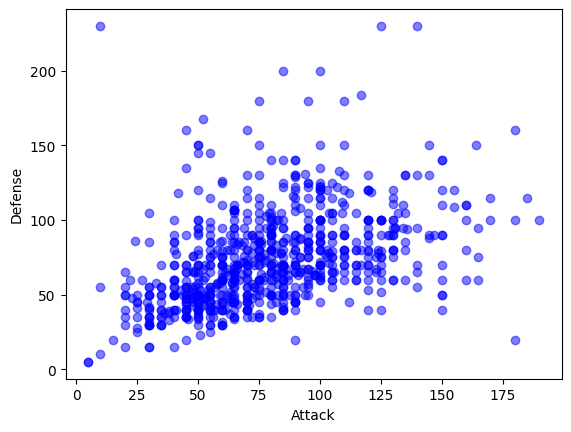

In [ ]:
# Scatter plot between variables: Attack and Defense

plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color='blue', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

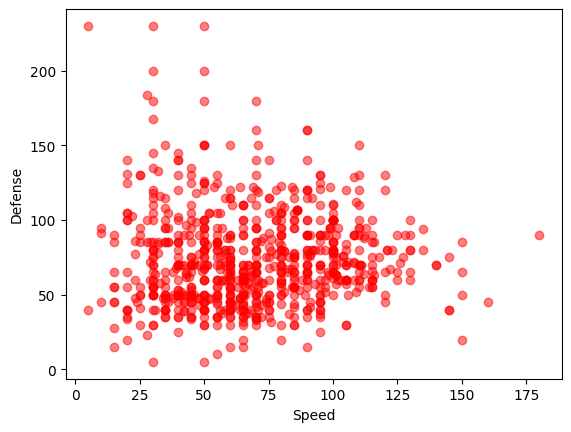

In [ ]:
# Scatter plot between variables: Speed and Defense

plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color='red', alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.show()

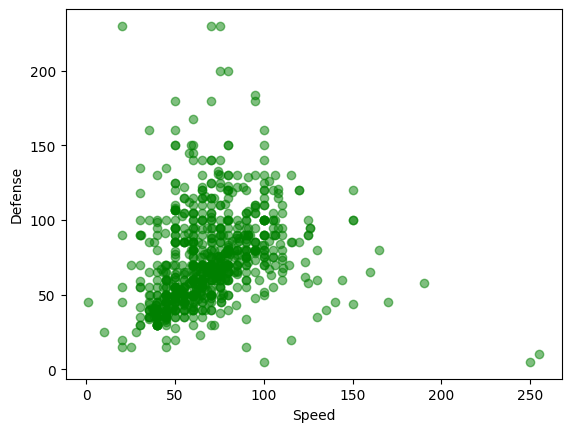

In [ ]:
# Scatter plot between variables: HP and Defense
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='green', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.show()

In [ ]:
# Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [ ]:
correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation2

0.015226598088597448

In [ ]:
# Select only numeric columns
numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop(columns=['#'], axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [ ]:
target_column = 'Attack'
correlation_results = {} # key = column, val = pearson_correlation

# for loop comparing target column and all other columns in the DataFrame
for column in numeric_columns.columns:
    if column != target_column:
        correlation = numeric_columns[column].corr(numeric_columns[target_column])
        correlation_results[column] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.39636175534923196,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

# Correlation matrix

In [ ]:
# Comparing all columns to each other. We could also create this with double for loops but it's not necessary.
correlation_matrix = numeric_columns.corr() # all columns are numeric here
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


# Visualizing with seaborn

In [ ]:
import seaborn as sns

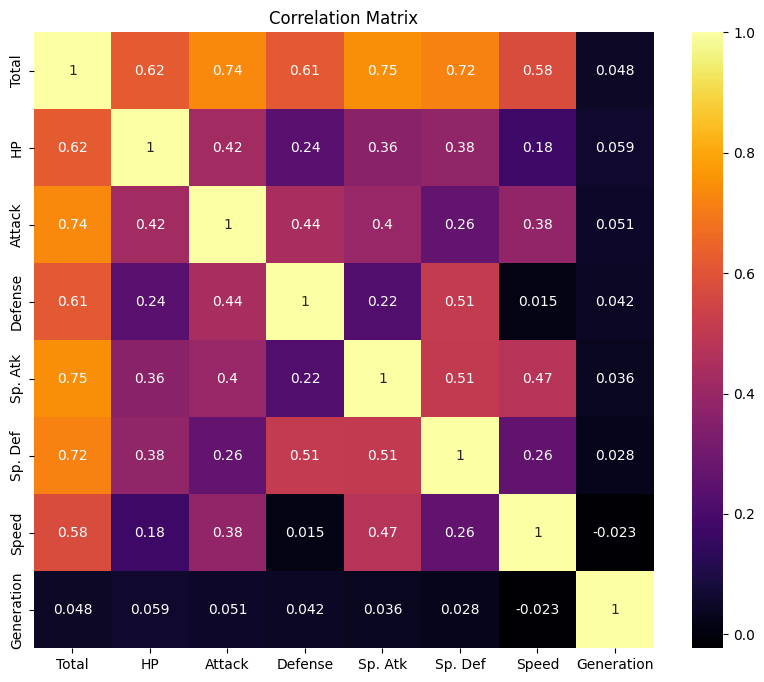

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix')
plt.show()

# Linear regression

Pearson correlation coefficient: 0.015226598088597448


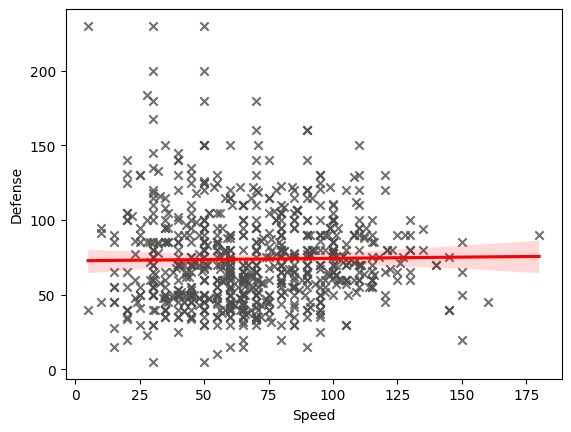

In [ ]:
sns.regplot(
    data=pokemon_df, x='Speed', y='Defense',
    ci=99, marker='x', color='.3', line_kws=dict(color='r'))

correlation2=pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)
plt.show()

## TEAMWORK

Pearson correlation coefficient: 0.5407436570609248


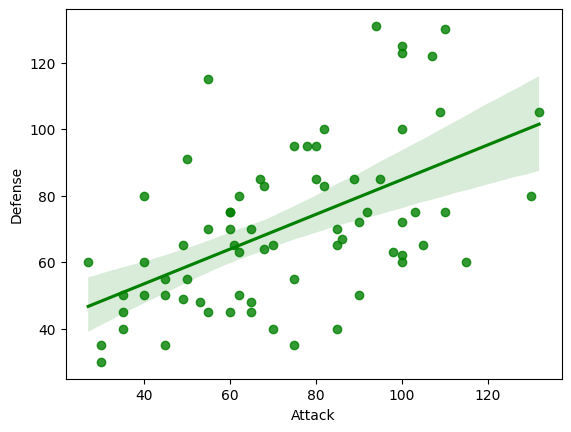

Pearson correlation coefficient: 0.5161628601933552


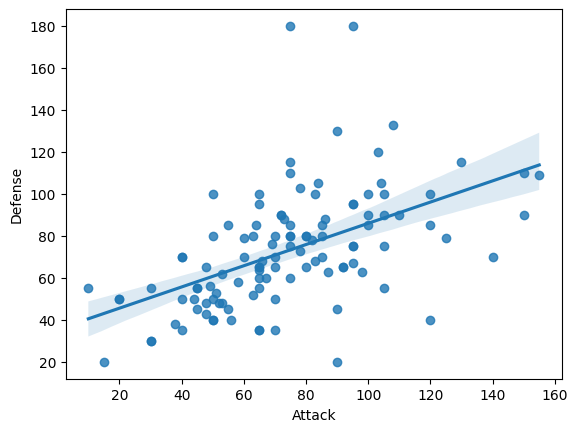

In [ ]:
#Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
#1. Create two DataFrame Grass and Water
#2. Create the regression plots for each (Grass and Water)
#3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)
#4. Explain to each other what do you see and what it means.

grass_pokemons = pokemon_df['Type 1'] == 'Grass'
grass_df = pokemon_df[grass_pokemons]

sns.regplot(data=grass_df, x='Attack', y='Defense', color='green')

grass_corr = grass_df['Attack'].corr(grass_df['Defense'])
print('Pearson correlation coefficient:', grass_corr)
plt.show()


water_pokemons = pokemon_df['Type 1'] == 'Water'
water_df = pokemon_df[water_pokemons]

sns.regplot(data=water_df, x='Attack', y='Defense')

water_corr = water_df['Attack'].corr(water_df['Defense'])
print('Pearson correlation coefficient:', water_corr)
plt.show()

Pearson correlation coefficient: 0.5161628601933552


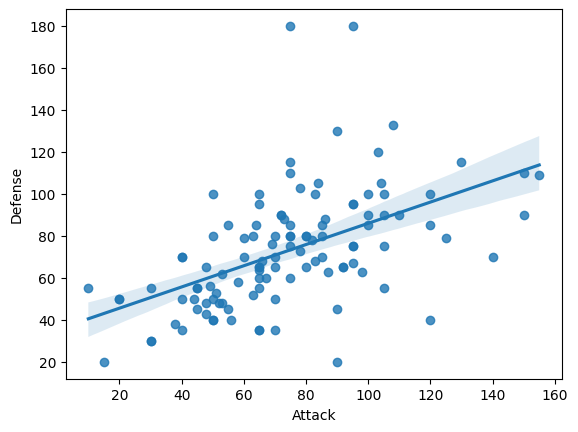

In [ ]:
water_pokemons = pokemon_df['Type 1'] == 'Water'
water_df = pokemon_df[water_pokemons]

sns.regplot(data=water_df, x='Attack', y='Defense')

water_corr = water_df['Attack'].corr(water_df['Defense'])
print('Pearson correlation coefficient:', water_corr)
plt.show()